<font size="6"><b>OPTIMIZATION</b></font>

Table of Contents
<div id="toc"></div>

---
# 1. OPTIMIZATION

- an important tool in 1) engineering problem solving and 2) decision science
- peolple optimize
- nature optimizes

<img src="./image_files/lifeguard.png", width =400 >


<a>
<img src="./image_files/light.jpg", width = 400, align=left>
<img src="./image_files/ant.jpg", width = 400, align=lfet>
</a>


<br>
(source: http://nautil.us/blog/to-save-drowning-people-ask-yourself-what-would-light-do)
<br>

__3 key components__
1. objective
2. decision variable or unknown
3. constraints

__Procedures__
1. The process of identifying objective, variables, and constraints for a given problem is known as "modeling"
2. Once the model has been formulated, optimization algorithm can be used to find its solutions.

In mathematical expression

$$\begin{align*}
\min_{x} \quad &f(x) \\
\text{subject to} \quad &g_i(x) \leq 0, \qquad i=1,\cdots,m
\end{align*}
$$

Remarks) equivalent

$$\begin{align*}
\min_{x}  f(x) \quad&\leftrightarrow \quad \max_{x} -f(x)\\
\quad g_i(x) \leq 0\quad&\leftrightarrow \quad -g_i(x) \geq 0\\
h(x) = 0 \quad&\leftrightarrow \quad 
\begin{cases}
  h(x) \leq 0 \quad \text{and} \\
  h(x) \geq 0 
\end{cases}
\end{align*}
$$

<br>
The good news: for many classes of optimization problems, people have already done all the "hardwork" of developing numerical algorithms 

- A wide range of tools that can take optimization problems in "natural" forms and compute a solution 

- Some well-known libraries: CVX and YALMIP

- CVX is a Matlab-based modeling system for convex optimization

- Download and install 
    - http://cvxr.com/cvx/    
    - http://cvxr.com/news/2014/02/cvx-demo-video/ (watch a demo)

- Convex optimization    
    - http://stanford.edu/~boyd/cvxbook/
    - [Lecture 1 | Convex Optimization I (Stanford)](https://www.youtube.com/watch?v=McLq1hEq3UY)

---
# 2. LINEAR PROGRAMMING

__Objective function and Constraints are both linear__

$$
\begin{align*} \max \; & \; 3x_1 + \frac{3}{2}x_2 \quad \quad \leftarrow \text{objective function}\\ \\
\text{subject to} \; &  -1 \leq x_1 \leq 2 \quad \leftarrow \text{constraints}\\
& \quad 0 \leq x_2 \leq 3 
\end{align*}
$$

Method 1: **graphical approach**

$$
3 x_1 + 1.5 x_2 = C \qquad \Rightarrow \qquad x_2 = -2 x_1 + \frac{2}{3}C
$$

<br>
<img src="./image_files/LP.jpg", width = 300> 
<br>

Method 2: **Matlab : linprog**

- neet to convert to the stardard form 
$\begin{cases}
\min \quad c^Tx\\
\text{subject to} \quad Ax \leq b\\
\end{cases}$


$$
\begin{array}{Icr}\begin{align*}
    \min \quad
     - & 3x_1 - 1.5 x_2\\
     \\
    \text{subject to} \quad \; \; \;
      & x_1 \leq 2\\ 
     - & x_1 \leq 1\\
      & x_2 \leq 3\\
     - & x_2 \leq 0
\end{align*}\end{array}
\quad \Longrightarrow \quad
\begin{array}{I} \quad \quad
    \min \quad
    \begin{bmatrix} 
        -3\\ -1.5
    \end{bmatrix}^T
    \begin{bmatrix} 
        x_1\\ x_2
    \end{bmatrix}\\
    \\
    \text{subject to}\quad
    \begin{bmatrix} 
        1&0\\ -1&0 \\ 0&1\\ 0&-1
    \end{bmatrix}
    \begin{bmatrix}
        x_1\\ x_2
    \end{bmatrix} \leq 
    \begin{bmatrix} 2\\ 1\\3\\0
    \end{bmatrix}
\end{array}
$$

Method 3: **CVX Matlab-based solver**
<br>

## LP Example

$$
\begin{array}{Icr}\begin{align*}
\max_{x} \quad & x_1 + x_2 \\
\text{subject to} \quad
& 2x_1 + x_2 \leq 29 \\
& x_1 + 2x_2 \leq 25 \\
& x_1 \geq 2 \\
& x_2 \geq 5
\end{align*}\end{array}
\quad\implies\quad
\begin{array}{I}
\quad \min_{x} \quad & - \begin{bmatrix} 1 & 1 \end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} \\
\text{subject to} \quad
& \begin{bmatrix} 2 & 1 \\ 1 & 2 \end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} \leq \begin{bmatrix} 29 \\ 25 \end{bmatrix} \\
& \begin{bmatrix} 2 \\ 5 \end{bmatrix} \leq \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} \leq \begin{bmatrix}  \\ \\ \end{bmatrix}
\end{array}
$$

### MATLAB code
- http://www.mathworks.com/help/optim/ug/linprog.html

```
>> help linprog

LINPROG Linear programming.
    X = LINPROG(f,A,b) attempts to solve the linear programming problem:
 
             min f'*x    subject to:   A*x <= b
              x
 
    X = LINPROG(f,A,b,Aeq,beq) solves the problem above while additionally
    satisfying the equality constraints Aeq*x = beq.
 
    X = LINPROG(f,A,b,Aeq,beq,LB,UB) defines a set of lower and upper
    bounds on the design variables, X, so that the solution is in
    the range LB <= X <= UB. Use empty matrices for LB and UB
    if no bounds exist. Set LB(i) = -Inf if X(i) is unbounded below;
    set UB(i) = Inf if X(i) is unbounded above.
```

In [5]:
f = -[1 1]';
A = [2 1;
    1 2];
b = [29,25]';
lb = [2 5];

[x, fval] = linprog(f,A,b,[],[],lb,[]);

display(x)
display(-fval)

Optimization terminated.

x =

   11.0000
    7.0000


ans =

   18.0000

### CVX code    
- Many examples will be provided throughout the class
- below example
    - http://cvxr.com/cvx/examples/ $\rightarrow$ Miscellaneous examples
    - http://inst.eecs.berkeley.edu/~ee127a/book/login/exa_lp_drug_manuf.html

In [13]:
clear x

f = [1 1]';
A = [2 1;
    1 2];
b = [29 25]';
lb = [2 5]';

cvx_begin quiet
    variable x(2,1)
    maximize (f'*x)
    subject to
        A*x <= b;
        lb <= x;
cvx_end

% Display results
disp('The optimal variable is');
disp(x);
disp('The ojective value is');
disp(cvx_optval);

The optimal variable is
   11.0000
    7.0000

The ojective value is
   18.0000

---
# 3. QUADRATIC PROGRAMMING

The problem can be found at <http://courses.csail.mit.edu/6.867/wiki/images/e/ef/Qp-quadprog.pdf>

$$
\begin{array}{Icr}\begin{align*}
\min \quad &\frac{1}{2}x^2+3x+4y  \\
\text{subject to} \quad 
& x+3y \geq  15 \\
& 2x+5y \leq  100 \\
& 3x+4y \leq  80 \\
& x,y \geq  0 \\
\end{align*}\end{array}
\quad\implies\quad
\begin{array}{I}
\min_{x} \quad & \frac{1}{2}x^THx + f^Tx \\
\text{subject to} \quad
& Ax \leq b \\
& A_{eq}x = b_{eq} \\
& LB \leq x \leq UB
\end{array}
$$

## MATLAB code

```
>> help quadprog

QUADPROG Quadratic programming. 
    X = QUADPROG(H,f,A,b) attempts to solve the quadratic programming 
    problem:
 
             min 0.5*x'*H*x + f'*x   subject to:  A*x <= b 
              x    
 
    X = QUADPROG(H,f,A,b,Aeq,beq) solves the problem above while 
    additionally satisfying the equality constraints Aeq*x = beq.
 
    X = QUADPROG(H,f,A,b,Aeq,beq,LB,UB) defines a set of lower and upper
    bounds on the design variables, X, so that the solution is in the 
    range LB <= X <= UB. Use empty matrices for LB and UB if no bounds 
    exist. Set LB(i) = -Inf if X(i) is unbounded below; set UB(i) = Inf if 
    X(i) is unbounded above.
```

In [1]:
clear all
f = [3; 4];
H = [1 0; 0 0];
A = [-1 -3; 2 5; 3 4];
b = [-15; 100; 80];
LB = [0; 0];

options = optimset('Algorithm','interior-point-convex');
[x,fval] = quadprog(H,f,A,b,[],[],LB,[],[],options);

disp(x)
disp(fval)

Minimum found that satisfies the constraints.

Optimization completed because the objective function is non-decreasing in 
feasible directions, to within the default value of the function tolerance,
and constraints are satisfied to within the default value of the constraint tolerance.



    0.0000
    5.0000

   20.0000

## CVX code

<http://inst.eecs.berkeley.edu/~ee127a/book/login/l_lqp_standard.html>

In [2]:
cvx_begin quiet
    variable x(2,1)
    minimize (1/2*x'*H*x + f'*x)
    subject to      % can be omitted
        A*x <= b;
        x >= 0;    
cvx_end

disp(x)
disp(cvx_optval)

0.0000
    5.0000

   20.0000

**Another example**

In [6]:
cvx_begin quiet
    variable x(2)
    minimize -3*x(1) - 3/2*x(2)
    subject to
        -1 <= x(1) <= 2
        0 <= x(2) <= 3
cvx_end

x
cvx_optval
cvx_cputime  
cvx_status   

x =

    2.0000
    3.0000


cvx_optval =

  -10.5000


cvx_cputime =

    0.1560


cvx_status =

Solved

---
# 4. LEAST-SQUARES
The problem can be found at Computational Methods for Data Analysis, Chap 17

## MATLAB code

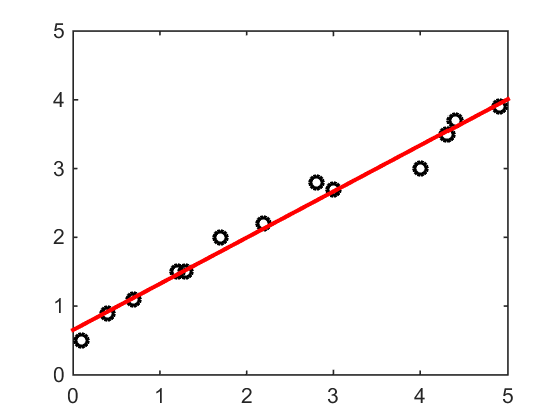

theta =

    0.6713
    0.6531

In [3]:
clear all
x = [0.1 0.4 0.7 1.2 1.3 1.7 2.2 2.8 3.0 4.0 4.3 4.4 4.9]';
y = [0.5 0.9 1.1 1.5 1.5 2.0 2.2 2.8 2.7 3.0 3.5 3.7 3.9]';

m = length(y);
A = [x ones(m,1)];

theta = inv(A'*A)*A'*y

xp = 0:0.01:5;
yp = theta(1)*xp + theta(2);

plot(x,y,'ko','linewidth',2);   hold on
plot(xp,yp,'r','linewidth',2);  hold off

## CVX code

similar example found at
<http://cvxr.com/cvx/examples/cvxbook/Ch06_approx_fitting/html/regressor_cvx.html>

In [4]:
clear theta

cvx_begin quiet
    variable theta(2,1)
    minimize norm(A*theta - y)
cvx_end

theta

theta =

    0.6713
    0.6531

---
# 5. INTEGER PROGRAMMING

- some or all of the variables are restricted to be integers. In many settings the term refers to integer linear programming (ILP), in which the objective function and the constraints (other than the integer constraints) are linear.

## 5.1. Mixed Integer Linear Programming (MILP)


A mixed-integer linear program is a problem with

- Linear objective function, $f^T x$, where $f$ is a column vector of constants, and $x$ is the column vector of unknowns
- Bounds and linear constraints, but no nonlinear constraints 
- Restrictions on some components of $x$ to have integer values

Matlab command: `intlinprog` (available from MATLAB R2014b)

```
>> help intlinprog

INTLINPROG Mixed integer linear programming.
 
    X = INTLINPROG(f,intcon,A,b) attempts to solve problems of the form
 
             min f'*x    subject to:  A*x  <= b
              x                       Aeq*x = beq
                                      lb <= x <= ub
                                      x(i) integer, where i is in the index
                                      vector intcon (integer constraints)


```

- Integer programming is not a part of convex optimzation problem. $\rightarrow$ we cannot use cvx.

### MATLAB code
** MILP Example 1**

$$\begin{align*}
\min_{x} \quad
& \begin{bmatrix} -3 & -1 \end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} \\
\text{subject to} \quad
& \begin{bmatrix} 17 & 11 \end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} \leq 83 \\
& \begin{bmatrix} 0 \\ 0 \end{bmatrix} \leq
\begin{bmatrix} x_1 \\ x_2 \end{bmatrix} \leq
\begin{bmatrix} 3 \\ 7 \end{bmatrix} \\
& x_1, x_2 \in \mathbb{Z} \; \text{(integer)}
\end{align*}
$$

In [4]:
f = [-3 -1]';
intcon = 1:2;
A = [17 11];
b = 83;
lb = [0 0]';
ub = [3 7]';

x = intlinprog(f,intcon,A,b,[],[],lb,ub)

LP:                Optimal objective value is -11.909091.                                           

Cut Generation:    Applied 1 Gomory cut.                                                            
                   Lower bound is -11.000000.                                                       
                   Relative gap is 0.00%.                                                          


Optimal solution found.

Intlinprog stopped at the root node because the objective value is within a gap tolerance of the optimal value, options.TolGapAbs = 0
(the default value). The intcon variables are integer within tolerance, options.TolInteger = 1e-05 (the default value).


x =

    3.0000
    2.0000

**MIP Example 2**

$$\begin{align*}
\min_{x} \quad
& \begin{bmatrix} -3 & -2 & -1 \end{bmatrix}
\begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix} \\
\text{subject to} \quad
& \begin{bmatrix} 1 & 1 & 1 \end{bmatrix}
\begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix} \leq 7 \\
& \begin{bmatrix} 4 & 2 & 1 \end{bmatrix}
\begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix} = 12 \\
& 0 \leq \begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix} \\
& x_3 \in \{0,1\}
\end{align*}
$$

In [16]:
f = [-3; -2; -1];
intcon = 3;
A = [1, 1, 1];
b = 7;
Aeq = [4,2,1];
beq = 12;
lb = zeros(3,1);
ub = [Inf;Inf;1];

x = intlinprog(f,intcon,A,b,Aeq,beq,lb,ub)

LP:                Optimal objective value is -12.000000.                                           


Optimal solution found.

Intlinprog stopped at the root node because the objective value is within a gap tolerance of the optimal value, options.TolGapAbs = 0
(the default value). The intcon variables are integer within tolerance, options.TolInteger = 1e-05 (the default value).


x =

         0
    5.5000
    1.0000

### Integer programming using cvx
- Integer programming is not a part of convex optimzation problem.

## 5.2. Binary Integer Programming

each variable can only take on the value of 0 or 1. This may represent the selection or rejection of an option, the turning on or off of switches, a yes/no answer, or many other situations.

$$ \begin{align*}
\min \quad & x_1 + x_2 + x_3 + x_4 + x_5 + x_6 \\
\\
\text{subject to} \quad
& x_1 + x_2 \geq 1 \\
& x_1 + x_2 + x_6\ \geq 1 \\
& x_3 + x_4 \geq 1 \\
& x_3 + x_4 + x_5 \geq 1 \\
& x_4 + x_5 + x_6 \geq 1 \\
& x_5 + x_6 \geq 1 \\
& x_1 \ x_2 \ x_3 \ x_4 \ x_5 \ x_6 \in \{0, 1\} \\
\end{align*}$$


### MATLAB code

In [5]:
% intligprog for Mixed Integer Linear Programming (MILP) available from Matlab 2014

f = ones(6,1);
A = ...
   -[1 1 0 0 0 0;
     1 1 0 0 0 1;
     0 0 1 1 0 0;
     0 0 1 1 1 0;
     0 0 0 1 1 1;
     0 1 0 0 1 1];
b = -ones(6,1);

intcon = 1:6;
lb = zeros(6,1);
ub = ones(6,1);
[x, fVal] = intlinprog(f,intcon,A,b,[],[],lb,ub)

LP:                Optimal objective value is 2.000000.                                             


Optimal solution found.

Intlinprog stopped at the root node because the objective value is within a gap tolerance of the optimal value, options.TolGapAbs = 0 (the default value).
The intcon variables are integer within tolerance, options.TolInteger = 1e-05 (the default value).


x =

     0
     1
     0
     1
     0
     0


fVal =

     2

### Integer programming using cvx
- Integer programming is not a part of convex optimzation problem.

# General or Standard Forms

1. Linear programming
$$\begin{align*}
\min_{x} \quad & f^Tx \\
\text{subject to} \quad 
& Ax \leq b\\
& A_{eq}x = b_{eq}\\
& LB \leq x \leq UB
\end{align*}
$$

2. Integer programming
$$\begin{align*}
\min_{x} \quad & f^Tx \\
\text{subject to} \quad
& Ax \leq b\\
& A_{eq}x = b_{eq}\\
& LB \leq x \leq UB\\
& x \in \mathbb{Z} \;\text{(integer)}
\end{align*}
$$

3. Mixed integer linear programming
$$\begin{align*}
\min_{x,z} \quad & f^T
\begin{bmatrix} x \\ z \end{bmatrix} \\
\text{subject to} \quad
& A \begin{bmatrix} x \\ z \end{bmatrix} \leq b \\
& A_{eq} \begin{bmatrix} x \\ z \end{bmatrix} = b_{eq}\\
& LB \leq \begin{bmatrix} x \\ z \end{bmatrix} \leq UB \\
& x \in \mathbb{R} \;\text{(real)} \\
& z \in \mathbb{Z}
\end{align*}
$$

4. Binary integer programming
$$\begin{align*}
\min_{x} \quad & f^Tx \\
\text{subject to} \quad
& Ax \leq b \\
& A_{eq}x = b_{eq} \\
& LB \leq x \leq UB \\
& x \in \{0,1\} 
\end{align*}
$$

5. Quadratic programming
$$\begin{align*}
\min_{x} \quad & \frac{1}{2}x^THx + f^Tx \\
\text{subject to} \quad
& Ax \leq b \\
& A_{eq}x = b_{eq} \\
& LB \leq x \leq UB
\end{align*}
$$




In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>